In [1]:
from bs4 import BeautifulSoup
import requests

In [16]:
!pip install plotly==5.11.0

  Attempting uninstall: plotly
    Found existing installation: plotly 5.6.0
    Uninstalling plotly-5.6.0:
      Successfully uninstalled plotly-5.6.0


In [2]:
url = BeautifulSoup("https://www.worldometers.info/coronavirus/",'html.parser')
raw_code = requests.get(url)
raw_code

C:\Users\User\anaconda3\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


<Response [200]>

'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n\n\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <title>COVID Live - Coronavirus Statistics - Worldometer</title>\n    <meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n\n    \n\t<!-- Favicon -->\n\t<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n\t<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n\t<
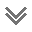

In [3]:
raw_code.text   #getting the html code in text fromat as from the view page source

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-ic
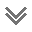

In [4]:
raw_code = BeautifulSoup(raw_code.text,"lxml")
raw_code   #getting the code in lxml format which can be further used as text format cant be used

In [5]:
table_code = raw_code.table
table_code   #only parsing/getting the code for table from the whole raw_code

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [6]:
tags = table_code.find_all('tr') #find_all is the function to return all 
tags

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>


In [7]:
raw_data = []
for tag in tags:
    x = tag.text.split('\n')
    if x[1] != '':
        raw_data.append(x[1:]) #removing the first empty column by [1:]

raw_data

[['#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests',
  'Tests/',
  '1M pop',
  '',
  'Population',
  'Continent',
  '1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl',
  'New Cases/1M pop',
  'New Deaths/1M pop',
  'Active Cases/1M pop',
  ''],
 ['1',
  'USA',
  '100,625,493',
  '',
  '1,105,546                                ',
  '',
  '98,124,036',
  '',
  '1,395,911',
  '3,248',
  '300,549',
  '3,302',
  '1,140,115,058',
  '3,405,308',
  '334,805,269 ',
  'North America',
  '',
  '33030',
  '',
  '',
  '4,169',
  ''],
 ['2',
  'India',
  '44,673,379',
  '',
  '530,620                                ',
  '',
  '44,136,872',
  '',
  '5,887',
  '698',
  '31,759',
  '377',
  '906,216,019',
  '644,245',
  '1,406,631,776 ',
  'Asia',
  '',
  '312,6512',
  '',
  '',
  '4',
  ''],
 ['3',
  'France',
  '37,846,799',
  

In [8]:
import csv

with open("covid_data.csv",'w') as file:
    x = csv.writer(file)
    x.writerows(raw_data)
    file.close()

In [25]:
import pandas as pd

df = pd.read_csv("covid_data.csv",encoding= 'unicode_escape')
# df = pd.read_csv("covid_data.csv",encoding= 'ISO-8859-1')

df

#   Country,Other   TotalCases NewCases  \
0      1             USA  100,625,493      NaN   
1      2           India   44,673,379      NaN   
2      3          France   37,846,799      NaN   
3      4         Germany   36,499,600      NaN   
4      5          Brazil   35,304,715      NaN   
..   ...             ...          ...      ...   
225  226            Niue          136      NaN   
226  227    Vatican City           29      NaN   
227  228  Western Sahara           10      NaN   
228  229      MS Zaandam            9      NaN   
229  230           China      323,686   +4,150   

                                   TotalDeaths  NewDeaths TotalRecovered  \
0    1,105,546                                        NaN     98,124,036   
1      530,620                                        NaN     44,136,872   
2      158,950                                        NaN     36,909,138   
3      157,943                                        NaN     35,821,900   
4      689,853                                        NaN     34,235,867   
..                                         ...        ...            ...   
225                                                   NaN            103   
226                                                   NaN             29   
227          1                                        NaN              9   
228          2                                        NaN              7   
229      5,233                                        NaN        281,106   

    NewRecovered ActiveCases Serious,Critical  ...     Tests/  \
0            NaN   1,395,911            3,248  ...  3,405,308   
1            NaN       5,887              698  ...    644,245   
2            NaN     778,711              869  ...  4,139,547   
3        +37,600     519,757            1,406  ...  1,458,359   
4            NaN     378,995            8,318  ...    296,146   
..           ...         ...              ...  ...        ...   
225          NaN          33              NaN  ...        NaN   
226          NaN           0              NaN  ...        NaN   
227          NaN           0              NaN  ...        NaN   
228          NaN           0              NaN  ...        NaN   
229       +2,419      37,347               99  ...    110,461   

                                            1M pop        Unnamed: 15  \
0                                     334,805,269       North America   
1                                   1,406,631,776                Asia   
2                                      65,584,518              Europe   
3                                      83,883,596              Europe   
4                                     215,353,593       South America   
..                                             ...                ...   
225                                         1,622   Australia/Oceania   
226                                           799              Europe   
227                                       626,161              Africa   
228                                                               NaN   
229  1,448,471,400                                               Asia   

    Population      Continent  \
0          NaN          33030   
1          NaN       312,6512   
2          NaN          24130   
3          NaN          25311   
4          NaN          63123   
..         ...            ...   
225        NaN             12   
226        NaN             28   
227        NaN  62,616626,161   
228        NaN            NaN   
229        NaN  4,475276,7969   

    1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl  New Cases/1M pop  \
0                                                  NaN                 NaN   
1                                                  NaN                 NaN   
2                                                  NaN                 NaN   
3                                                  NaN                 NaN   
4                                               

In [28]:
import plotly.graph_objects as go
country = df['Country,Other'][0:10]
total_cases = df['TotalCases'][0:10]

new_total_cases = []

for i in total_cases:
    new_total_cases.append(int(i.replace(',','')))

fig = go.Figure([go.Bar(x=country, y=new_total_cases)])
fig.show()

In [29]:
import plotly.graph_objects as go
country = df['Country,Other'][0:10]
total_cases = df['TotalCases'][0:10]

new_total_cases = []

for i in total_cases:
    new_total_cases.append(int(i.replace(',','')))


fig = go.Figure(data=[go.Pie(labels=country, values=new_total_cases)])
fig.show()

In [40]:
import plotly.graph_objects as go
country = df['Country,Other'][0:10]
total_death = df['TotalDeaths'][0:10]
total_recovered = df['TotalRecovered'][0:10]


new_total_deaths = []

for death in total_death:
    new_total_deaths.append(int(death.replace(',','')))
    
new_total_recovered = []

for rec in total_recovered:
    new_total_recovered.append(int(rec.replace(',','')))


fig = go.Figure(data=[
    go.Bar(name='Totalcases', x=country, y=new_total_cases),
    go.Bar(name='TotalRecovered', x=country, y=new_total_recovered),
    go.Bar(name='TotalDeaths', x=country, y=new_total_deaths)
    
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()